In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/kali/.local/lib/python3.9/site-packages/pandas/compat/_optional.py:149: UserWarning: Pandas requires version '1.3.1' or newer of 'bottleneck' (version '1.2.1' currently installed).
  warnings.warn(msg, UserWarning)


In [164]:
df = pd.read_csv('/home/kali/Downloads/titanictrain.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [166]:
# Different Datatypes in our dataset
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# How our dataset appears
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# dataset shape(rows, columns)
df.shape

(891, 12)

In [7]:
# Number of missing values.
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Percentage of missing values
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [9]:
# columns in dataset

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
# Seperating Quantitative and Qualitative Features

In [12]:
categorical_features = [ ]
numerical_features = [ ]

for feature in df.columns :
    if df[feature].dtypes == 'O' :
        categorical_features.append(feature)
    else :
        numerical_features.append(feature)

In [40]:
# Categorical features
categorical_features.remove('Name')
categorical_features

['Sex', 'Ticket', 'Cabin', 'Embarked']

In [43]:
# Numerical features
numerical_features.pop(0)
numerical_features

['Age', 'SibSp', 'Parch', 'Fare']

In [15]:
df['Name'].nunique()

891

In [167]:
# we have 891 unique values for the name and if we do any word embedding it would lead us to
# larger feature space. So i'm going to remove this feature from dataset
df.drop('Name', inplace = True, axis = 'columns')

In [168]:
# PassengeId also don't give us a that much information, So we will remove that also
df.drop('PassengerId', inplace = True, axis = 'columns')

In [18]:
# EDA 

<AxesSubplot:xlabel='Age', ylabel='Count'>

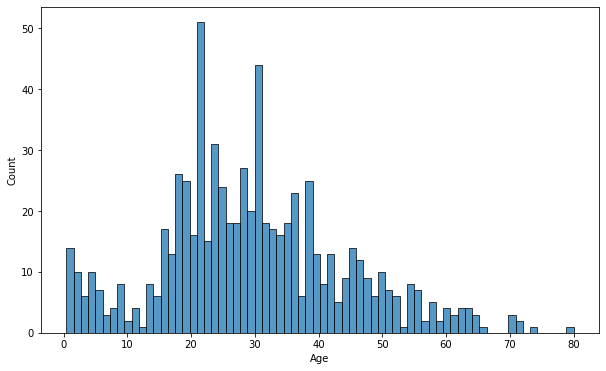

In [19]:
plt.figure(figsize = (10,6))
sns.histplot(data = df, x = df['Age'], bins = 70)

In [20]:
# so most of the people are between 18 - 40 

<AxesSubplot:xlabel='SibSp', ylabel='count'>

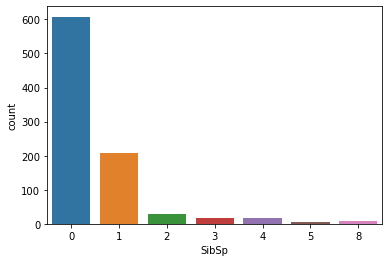

In [21]:
sns.countplot(data = df, x = df['SibSp'])

In [22]:
# Many peoples don't have a siblings
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='count'>

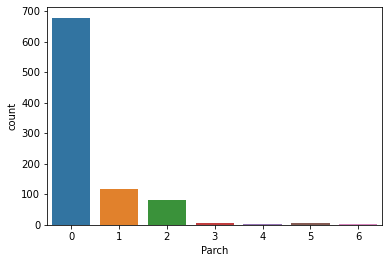

In [23]:
sns.countplot(data = df, x = df['Parch'])

In [24]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

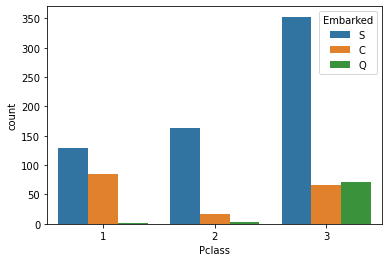

In [399]:
print(df['Pclass'].value_counts())
sns.countplot(data = df, x = df['Pclass'], hue = 'Embarked')

0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

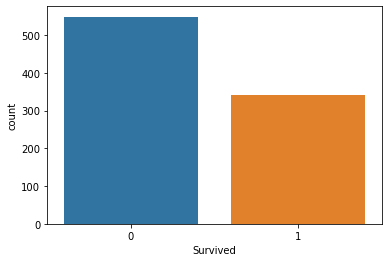

In [26]:
print(df['Survived'].value_counts())
sns.countplot(data = df, x = df['Survived'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

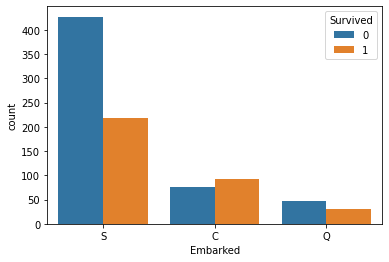

In [392]:
sns.countplot(data = df, x = df['Embarked'], hue = 'Survived')

<AxesSubplot:xlabel='Sex', ylabel='count'>

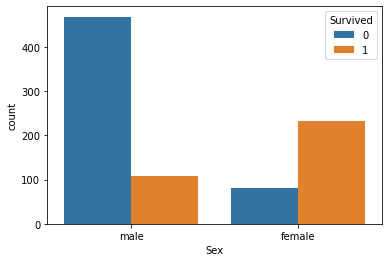

In [404]:
sns.countplot(data = df, x = df['Sex'], hue = 'Survived')

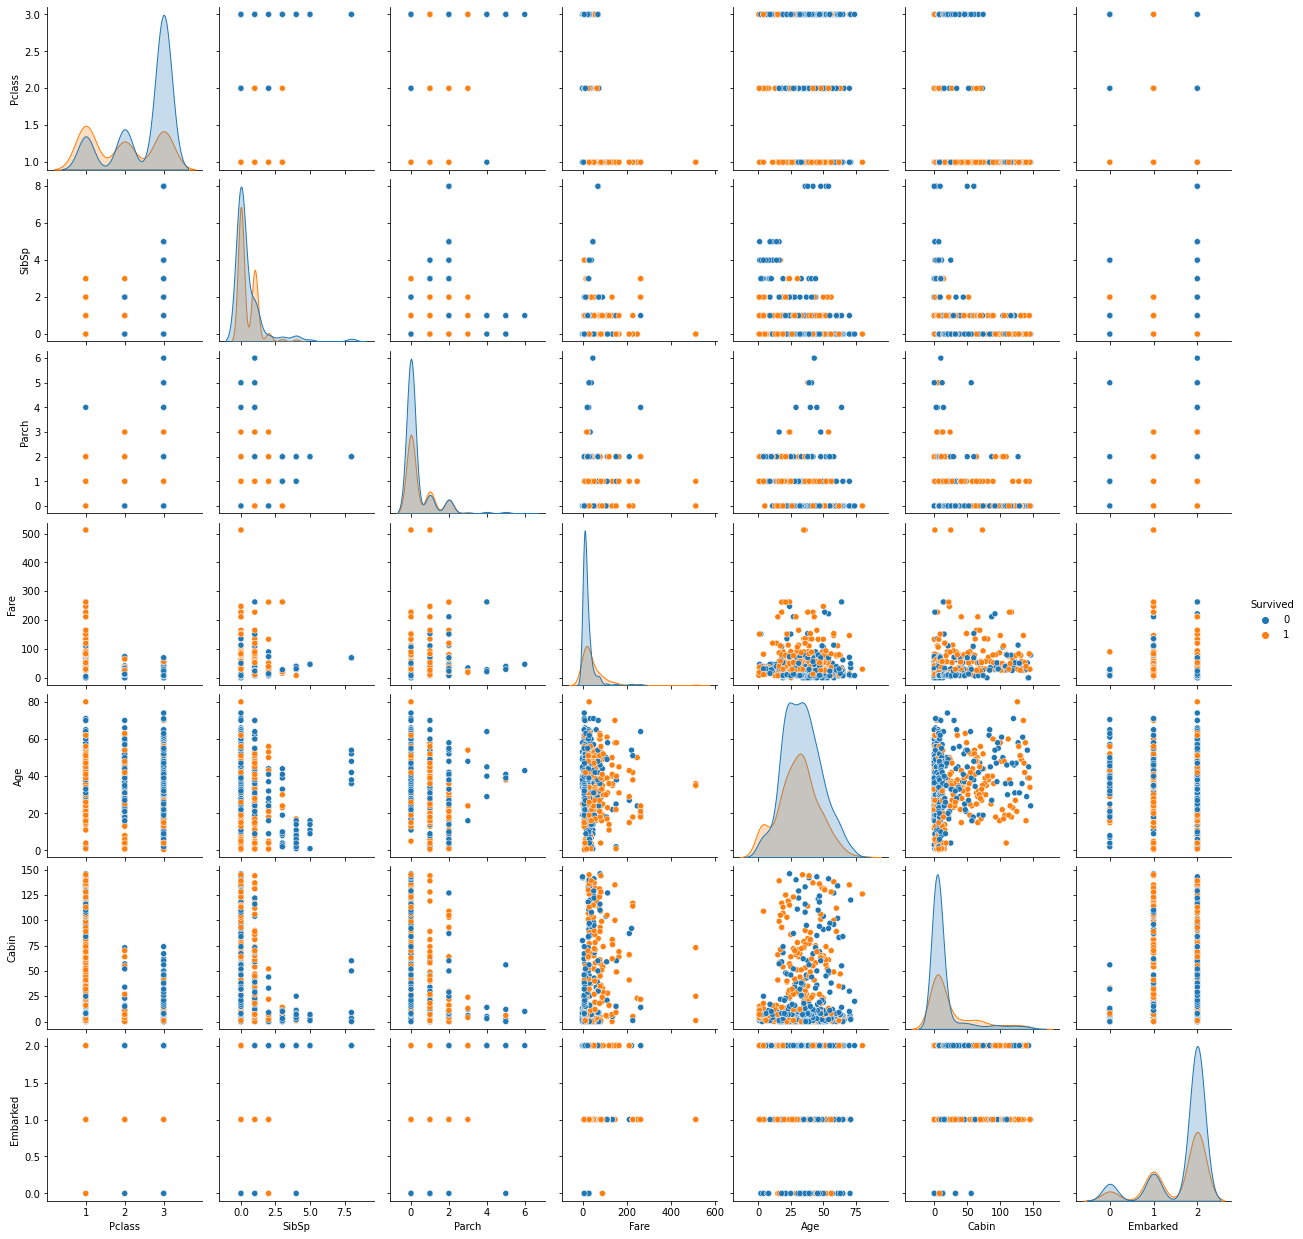

In [405]:
sns.pairplot(data = df, hue = 'Survived')

In [52]:
# from this we can notice, there are many childrens whose age 0 - 1 has a parent travelling with 
# them and they have been rescued. And whoever has a 3 - above siblings, they have been not
# recused, when they have a parent children relationship also they have been recused.

<AxesSubplot:xlabel='Age', ylabel='Count'>

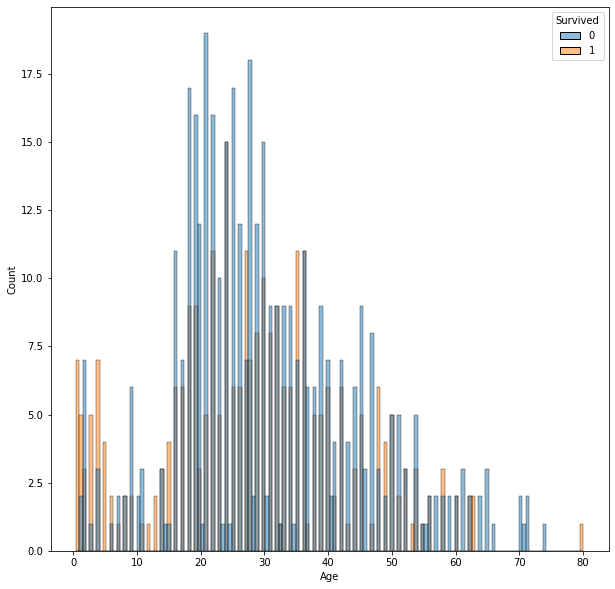

In [60]:
plt.figure(figsize = (10, 10))
sns.histplot(data = df, x = 'Age', hue = 'Survived', bins = 150)

<AxesSubplot:xlabel='Sex', ylabel='count'>

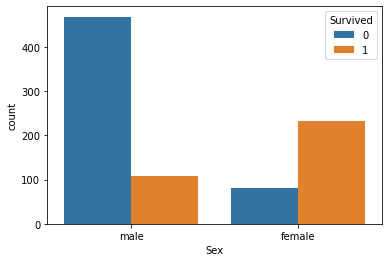

In [62]:
sns.countplot(data = df, x = 'Sex', hue = 'Survived')

<AxesSubplot:xlabel='Age', ylabel='count'>

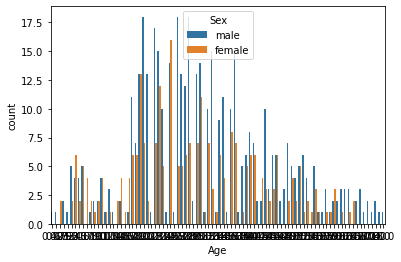

In [66]:
sns.countplot(data = df, x = 'Age', hue = 'Sex')

In [73]:
df.Age.groupby(by = df['Survived']).count()

Survived
0    424
1    290
Name: Age, dtype: int64

In [ ]:
# There is no relationship between Age and Other Observed Values.

In [76]:
df[df.Age.isna()].Survived.value_counts()
# 52 peoples who were survived also, don't provided there age details, 125 peoples who were
# died, we don't have the record of their age.

0    125
1     52
Name: Survived, dtype: int64

In [77]:
df[df.Age.isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,0,3,male,NaN,0,0,330877,8.4583,NaN,Q
17,1,2,male,NaN,0,0,244373,13.0000,NaN,S
19,1,3,female,NaN,0,0,2649,7.2250,NaN,C
26,0,3,male,NaN,0,0,2631,7.2250,NaN,C
28,1,3,female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,2629,7.2292,NaN,C
863,0,3,female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,0,3,male,NaN,0,0,345777,9.5000,NaN,S
878,0,3,male,NaN,0,0,349217,7.8958,NaN,S


In [ ]:
# From domain understanding we can able to understand that, in old days peoples use any material 
# to note their ages. So they don't know their real age. So it could be a reason of missing value
# of age .

In [94]:
df['Age'].groupby(df.Survived).count()

Survived
0    424
1    290
Name: Age, dtype: int64

In [95]:
# we are having the age record of peoples who were also died in the incident

In [124]:
df[(df['Age'].isna()) & ((df['Sex'] == 'female') & ((df['SibSp'] >=1 ) | (df['Parch'] >= 1) ))].index

Int64Index([ 31, 109, 128, 140, 166, 180, 186, 229, 240, 241, 330, 334, 347,
            375, 409, 431, 457, 485, 533, 578, 593, 612, 669, 792, 849, 863,
            888],
           dtype='int64')

In [122]:
len(df[(df['Age'].isna()) & ((df['Sex'] == 'female') & ((df['SibSp'] >=1 ) | (df['Parch'] >= 1) ))])

27

In [123]:
len(df[(df['Age'].isna()) & ((df['Sex'] == 'male') & ((df['SibSp'] >=1 ) | (df['Parch'] >= 1) ))])

17

In [133]:
df[df['Age'].isna()]['Sex'].value_counts()

male      124
female     53
Name: Sex, dtype: int64

In [ ]:
# The Age data is missing compeletely at random, So we can use Random Sampling Method
# I will use random sampling method to fill the missing values of Age, But with different way
# bcoz i saw some information regards to the age

In [317]:
# Random sampling
df['new_sample_df'] = df['Age']
sample_values = df[(df['Age'] > 32) & (df['Age'].notnull())].sample(missing_count, random_state = 0)
print(sample_values)
sample_values.index = df[df['Age'].isna()].index
df.loc[df['Age'].isna(), 'new_sample_df'] = sample_values

     Survived  Pclass     Sex  SibSp  Parch       Ticket      Fare Cabin  \
639         0       3    male      1      0       376564   16.1000   NaN   
513         1       1  female      1      0     PC 17603   59.4000   NaN   
259         1       2  female      0      1       230433   26.0000   NaN   
217         0       2    male      1      0       243847   27.0000   NaN   
155         0       1    male      0      1     PC 17597   61.3792   NaN   
..        ...     ...     ...    ...    ...          ...       ...   ...   
245         0       1    male      2      0        19928   90.0000   C78   
772         0       2  female      0      0  S.O./P.P. 3   10.5000   E77   
222         0       3    male      0      0        21440    8.0500   NaN   
460         1       1    male      0      0        19952   26.5500   E12   
557         0       1    male      0      0     PC 17757  227.5250   NaN   

    Embarked   Age newcabin  new_sample_df  
639        S  35.0      NaN           35.0

ValueError: Length mismatch: Expected axis has 177 elements, new values have 0 elements

In [155]:
missing_count = len(df[df['Age'].isna()])
df.drop('Age', inplace = True, axis = 1)

<AxesSubplot:ylabel='Density'>

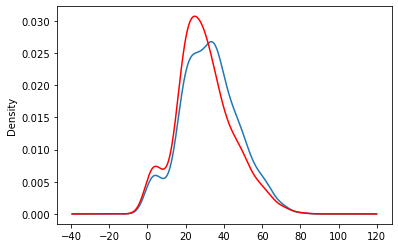

In [197]:
df['new_sample_df'].plot(kind = 'kde')
dummy['Age'].plot(kind = 'kde', color = 'red')

In [203]:
df['Age'] = df['new_sample_df']

In [205]:
df.drop('new_sample_df', inplace = True, axis = 1)

In [211]:
df['Cabin'].isna().sum() / len(df)
df['Cabin'].count()

204

In [210]:
df['Cabin'].nunique()

147

In [214]:
cabin_notnull = df[df['Cabin'].notnull()]

In [216]:
cabin_notnull.groupby('Embarked').count()

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Age
Embarked,,,,,,,,,
C,69,69,69,69,69,69,69,69,69
Q,4,4,4,4,4,4,4,4,4
S,129,129,129,129,129,129,129,129,129


In [217]:
cabin_notnull.groupby('Pclass').count()

,Survived,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
Pclass,,,,,,,,,
1,176,176,176,176,176,176,176,174,176
2,16,16,16,16,16,16,16,16,16
3,12,12,12,12,12,12,12,12,12


In [222]:
len(df[(df['Cabin'].isna()) & (df['Pclass'] == 1)])

40

In [223]:
len(df[(df['Cabin'].isna()) & (df['Pclass'] == 2)])

168

In [224]:
len(df[(df['Cabin'].isna()) & (df['Pclass'] == 3)])

479

In [225]:
# Only few peoples are in first class missing the cabin information, more than 95 % are missing
# in second and third class passengers.

In [ ]:
# so iam going to create a new sample for cabin with given information where i will create with
# percentage of cabin of second and third repeating most times, bcoz we should have some distinguish betwe
# classes.

In [226]:
no_of_missing_value_incabin = df['Cabin'].isna().sum()

In [227]:
no_of_missing_value_incabin

687

In [246]:
# values of cabin of known in plcass 3
values = cabin_notnull[cabin_notnull['Pclass'] == 3].Cabin.unique()
values = [v for v in values]
values 

['G6', 'F G73', 'F E69', 'E10', 'F G63', 'E121', 'F38']

In [247]:
# values of cabin known in pclass 2
values1 = cabin_notnull[cabin_notnull['Pclass'] == 2].Cabin.unique() 
values1 = [v for v in values1]
values1

['D56', 'F33', 'E101', 'F2', 'F4', 'D', 'E77']

In [309]:
# in plcass 3 there are 16 samples as a cabin record and 479 samples don't contain the info
# of cabin . So we will generate a 479 cabin values from the known values of the pclass3 
# cabin values

import random
samples_of_cabin1 = (random.choices(values, k = 479))

# in plcass 2 there are 12 samples that are known for cabin, and 168 don't conatin the info
# so gonna generate 168 values from 12 known values
samples_of_cabin2 = (random.choices(values1, k = 168))

# in pclass 1 there are 179 known cabib=n rcords, only 40 is unknown.

samples_of_cabin3 = cabin_notnull[cabin_notnull['Pclass'] == 1].sample(40, random_state = 0)['Cabin']
samples_of_cabin3 = [v for v in samples_of_cabin3]

In [338]:
df['newcabin'] = df['Cabin']
samples_of_cabin = samples_of_cabin1 + samples_of_cabin2 + samples_of_cabin3
samples_of_cabin = pd.DataFrame(samples_of_cabin)

In [311]:
# we generated 687 new cabin values from random sampling which is same number of missing
# values in the cabin
len(samples_of_cabin)

687

In [312]:
samples_of_cabin.index =  df[df['Cabin'].isna()].index 

In [339]:
df.loc[df['Cabin'].isna(), 'newcabin'] = combined_df['Cabin']

In [320]:
df[df['Cabin'].isna()]

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age,newcabin
0,0,3,male,1,0,A/5 21171,7.2500,NaN,S,22.0,NaN
2,1,3,female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,NaN
4,0,3,male,0,0,373450,8.0500,NaN,S,35.0,NaN
5,0,3,male,0,0,330877,8.4583,NaN,Q,40.0,NaN
7,0,3,male,3,1,349909,21.0750,NaN,S,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,0,0,SOTON/OQ 392076,7.0500,NaN,S,25.0,NaN
885,0,3,female,0,5,382652,29.1250,NaN,Q,39.0,NaN
886,0,2,male,0,0,211536,13.0000,NaN,S,27.0,NaN
888,0,3,female,1,2,W./C. 6607,23.4500,NaN,S,55.0,NaN


In [326]:
combined_df = pd.concat([df[df['Cabin'].isna()], samples_of_cabin], axis = 1)

In [328]:
combined_df['Cabin'] = combined_df[0]

In [335]:
combined_df.drop(0, axis = 1, inplace = True)

In [341]:
df.drop('Cabin', inplace = True, axis = 1)

In [342]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
Age         0
newcabin    0
dtype: int64

In [346]:
df['Cabin'] = df['newcabin']

In [348]:
df.drop('newcabin', inplace = True, axis = 1)
df_copy = df.copy()
df = pd.concat([df, dummy['Embarked']], axis = 1)

In [393]:
# Categorical Encoding
val = df['Cabin'].value_counts().sort_values(ascending = False).index
val

Int64Index([146, 145, 144, 143, 142, 141, 140, 139, 138, 137,
            ...
             11,   9,   1,  15,   6,   5,   4,   3,   2,   0],
           dtype='int64', length=147)

In [394]:
c = 0
val_dic = {
    
}
for i in val :
    val_dic[i] = c 
    c += 1 

In [395]:
# iam giving small value for most occuring cabin category, bcoz before we done a missing imputaion
# where we gave many values for cabin 2 and 3 pclass so pclass1 cabin are important
# so they mostly won't occur many so iam giving larger values for less occuring, Indicating
# our model that the cabin pclass1 is more important than pclass2 and pclass 3

In [396]:
df['Cabin1'] = df['Cabin'].map(val_dic)

In [397]:
df['Cabin'] = df['Cabin1']
df.drop('Cabin1', inplace = True, axis = 1)

In [400]:
# Encoding the Embarked , Im giving 2to 'S' bcoz many people who where from 'Southamptan' Survived
# 'C' as 1 bcoz second most many peoples survived

In [402]:
dict_em = {
    'S' : 2,
    'C' : 1,
    'Q' : 0
    
}
df['Embarked'] = df['Embarked'].map(dict_em)

In [407]:
# Encoding of gender
dict_gender = {
    'female' : 1,
    'male' : 0
}
df['Sex'] = df['Sex'].map(dict_gender)

In [408]:
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Cabin,Embarked
0,0,3,0,1,0,7.2500,22.0,2,2
1,1,1,1,1,0,71.2833,38.0,82,1
2,1,3,1,0,0,7.9250,26.0,0,2
3,1,1,1,1,0,53.1000,35.0,43,2
4,0,3,0,0,0,8.0500,35.0,2,2
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,13.0000,27.0,52,2
887,1,1,1,0,0,30.0000,19.0,113,2
888,0,3,1,1,2,23.4500,55.0,29,2
889,1,1,0,0,0,30.0000,26.0,32,1


In [409]:
df.to_csv('/home/kali/very_important_titanicdf.csv')

In [412]:
from sklearn.decomposition import PCA 

In [418]:
pca = PCA(n_components=2)

In [419]:
new = pca.fit_transform(X)

In [421]:
new = pd.DataFrame(new)

<AxesSubplot:xlabel='0', ylabel='1'>

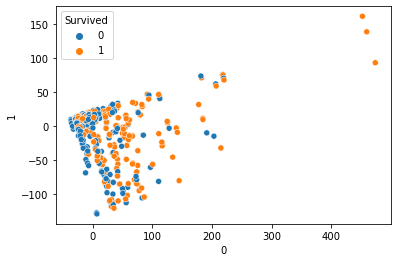

In [423]:
sns.scatterplot(x = new[0], y = new[1], hue = y)

In [415]:
y = df['Survived']
df.drop('Survived', inplace = True, axis = 1)
X = df